# Restaurants Reviews

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

In [31]:
# https://www.kaggle.com/vigneshwarsofficial/reviews

In [32]:
df = pd.read_csv('/Users/hernantrujillo/Documents/Metis/NBM_Unsupervised_Student-main/Restaurant_Reviews.tsv', delimiter='\t', quoting = 3) #3 means ignoring double quotes 

In [33]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [92]:
df.Review

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

In [34]:
df.shape

(1000, 2)

In [35]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [36]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [37]:
df["Liked"].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [38]:
liked_perc = round(df.Liked.value_counts() / len(df) *100, 2)
liked_perc

1    50.0
0    50.0
Name: Liked, dtype: float64

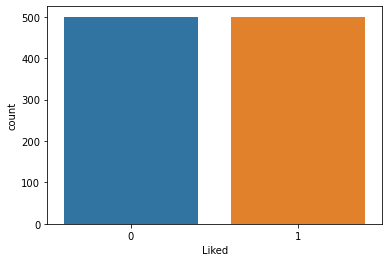

In [39]:
sns.countplot(x = df["Liked"])
plt.savefig('/Users/hernantrujillo/Documents/Metis/NBM_Unsupervised_Student-main/charts/reviews.png')

array([[<AxesSubplot:title={'center':'Liked'}>]], dtype=object)

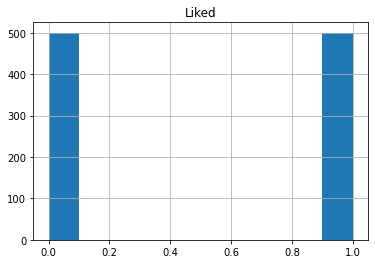

In [41]:
df.hist()

In [42]:
#Impoorting required packages
import re

#dopwnloading Stopwords list
import nltk
nltk.download('stopwords')

#importing stopwords
from nltk.corpus import stopwords

#importing stemming package
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hernantrujillo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
#Cleaning the texts
#Removing puncutations, and number
#^ represents don't want to remove
#Keeping the letters a to z and A to Z with space
#collection of text is called as corpus
#Creating the Bag of words model
corpus = []
for i in range(0,1000):
    
    review = re.sub('[^a-zA-Z]',' ',df['Review'][i])
    
    #putting all letters in lower case
    review = review.lower()
    
    #Removing stopwords from string and stemming the word
    
    #Stemming is used for make the words to normal form (root) like loved will become like love, loving will become love and capital letter of first letter will become small
    #Stemming is taking of root of the word
    
    review = review.split()
    
    ps = PorterStemmer()
    
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    
    #Joining the words to make a string
    
    review =' '.join(review)
    corpus.append(review)

In [44]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [45]:
from wordcloud import WordCloud

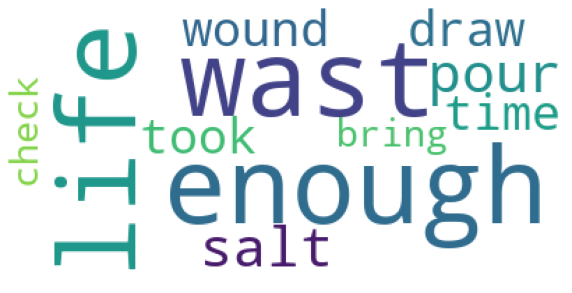

In [120]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(review)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='hanning')
plt.axis("off")
plt.savefig('/Users/hernantrujillo/Documents/Metis/NBM_Unsupervised_Student-main/charts/word_cloud.png')

In [56]:
#Tokenization is the process of taking all words of the review and making them one column for each word
from sklearn.feature_extraction.text import CountVectorizer

#max_features is used to remove non relavent words
cv = CountVectorizer(max_features = 1500)

#Spars metrics in NLP
X = cv.fit_transform(corpus)
y = df.iloc[:,1].values

In [111]:
pd.DataFrame(X.toarray(), index=corpus, columns=cv.get_feature_names()).head(10)

,absolut,absolutley,accid,accommod,accomod,accordingli,account,ach,acknowledg,across,...,year,yellow,yellowtail,yelper,yet,yucki,yukon,yum,yummi,zero
wow love place,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
crust good,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tasti textur nasti,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
stop late may bank holiday rick steve recommend love,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
select menu great price,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
get angri want damn pho,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
honeslti tast fresh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
potato like rubber could tell made ahead time kept warmer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fri great,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
great touch,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [112]:
from sklearn.decomposition import NMF

In [113]:
nmf_model = NMF(2)
doc_topic = nmf_model.fit_transform(X)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [114]:
doc_topic

array([[0.        , 0.2851457 ],
       [0.10509691, 0.        ],
       [0.00726938, 0.00099161],
       ...,
       [0.        , 0.19100673],
       [0.01821985, 0.17425408],
       [0.02734991, 0.05526282]])

The W matrix shows us the 2 resulting topics, and the terms that are associated with each topic. In this case:
- Component 1 (topic 1) seems to be about 
- Component 2 (topic 2) seems to be about 

In [115]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2"],
             columns = cv.get_feature_names())
topic_word

,absolut,absolutley,accid,accommod,accomod,accordingli,account,ach,acknowledg,across,...,year,yellow,yellowtail,yelper,yet,yucki,yukon,yum,yummi,zero
component_1,0.024,0.0,0.00,0.001,0.002,0.017,0.000,0.0,0.022,0.000,...,0.004,0.0,0.001,0.000,0.035,0.000,0.001,0.002,0.001,0.000
component_2,0.013,0.0,0.02,0.002,0.000,0.000,0.002,0.0,0.000,0.004,...,0.061,0.0,0.000,0.021,0.025,0.001,0.000,0.007,0.008,0.015


In [116]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [117]:
display_topics(nmf_model, cv.get_feature_names(), 10)


Topic  0
food, good, servic, great, bad, friendli, like, price, time, wait

Topic  1
place, go, back, time, like, would, never, eat, realli, love


The H matrix shows us the documents we started with, and how each document is made up of the 2 resulting topics. In this case:
- The first document seems to be about Negative Reviews
- The last document seems to be about Positive Reviews
- Everything in between is a combination of the two

In [118]:
H = pd.DataFrame(doc_topic.round(5),
             index = corpus,
             columns = ["component_1","component_2"])
H

,component_1,component_2
wow love place,0.00000,0.28515
crust good,0.10510,0.00000
tasti textur nasti,0.00727,0.00099
stop late may bank holiday rick steve recommend love,0.00173,0.06031
select menu great price,0.08676,0.01227
...,...,...
think food flavor textur lack,0.19977,0.00348
appetit instantli gone,0.00000,0.00300
overal impress would go back,0.00000,0.19101
whole experi underwhelm think go ninja sushi next time,0.01822,0.17425
